# 🎥 Advanced Video Frame Extractor

## Overview
This notebook provides a comprehensive solution for video frame extraction with visualization capabilities.

### 🔑 Key Features
- Efficient multi-threaded frame extraction
- Video metadata analysis and display
- Frame visualization using matplotlib
- Customizable frame saving options
- Robust error handling

### 📚 Dependencies
```bash
pip install opencv-python matplotlib numpy
```

### 🎯 How It Works
1. Video Loading: Opens and validates the input video file
2. Metadata Extraction: Analyzes video properties (fps, resolution, etc.)
3. Frame Processing: Extracts frames using multiple threads
4. Visualization: Displays sample frames using matplotlib

## 📦 Required Libraries

This project requires several Python libraries:

- **OpenCV (cv2)**: For video processing and frame extraction
- **NumPy**: For efficient array operations on image data
- **Matplotlib**: For visualizing extracted frames
- **Pathlib**: For cross-platform path handling
- **concurrent.futures**: For parallel processing

### Installation
```bash
pip install opencv-python matplotlib numpy
```

### Import Statement Details
- `cv2`: Main video processing functions
- `os.path`: Path manipulation functions
- `numpy as np`: Array operations for image data
- `matplotlib.pyplot`: Frame visualization
- `Path`: Modern path operations
- `ThreadPoolExecutor`: Parallel frame processing
- `display, HTML`: Jupyter notebook display utilities

## 📦 Required Libraries

Let's import all necessary libraries for our video processing task:
1. OpenCV (cv2) - Core video processing
2. NumPy (np) - Array operations
3. Matplotlib (plt) - Frame visualization
4. Path - File operations
5. ThreadPoolExecutor - Parallel processing
6. HTML/Display - Notebook formatting

In [1]:
import os
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from concurrent.futures import ThreadPoolExecutor, as_completed

## 🎥 Video Information Functions

### get_video_info Function
This function extracts these key properties from a video:
- FPS (Frames Per Second)
- Total frame count
- Video duration
- Frame resolution
- Aspect ratio

Input: OpenCV VideoCapture object
Output: Dictionary of video properties

In [2]:
def get_video_info(cap):
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    duration = total_frames / fps if fps > 0 else 0
    
    return {
        "FPS": fps,
        "Total Frames": total_frames,
        "Duration (seconds)": f"{duration:.2f}",
        "Resolution": f"{width}x{height}",
        "Aspect Ratio": f"{width/height:.2f}"
    }

### display_video_info Function
Creates a formatted HTML table to display video metadata in the notebook.
Input: Dictionary of video properties
Output: HTML table with property-value pairs

In [3]:
def display_video_info(info):
    """Display video metadata in a formatted HTML table."""
    html = "<table style='width:50%; border:1px solid black;'>"
    html += "<tr><th style='text-align:left; padding:8px;'>Property</th><th style='text-align:left; padding:8px;'>Value</th></tr>"
    for key, value in info.items():
        html += f"<tr><td style='padding:8px;'>{key}</td><td style='padding:8px;'>{value}</td></tr>"
    html += "</table>"
    display(HTML(html))

### Frame Processing Functions

### save_frame Function
Saves a video frame as an image file with specified quality.
Input: Frame data, frame number, output directory, JPEG quality
Output: None

In [4]:
def save_frame(frame, frame_count, dir, quality=95):
    """Save a video frame as an image file with specified quality.
    
    Args:
        frame (np.ndarray): Image data
        frame_count (int): Frame number
        dir (str): Output directory
        quality (int): JPEG quality (0-100)
    """
    frame_path = os.path.join(dir, f"frame_{frame_count:04d}.jpg")
    cv2.imwrite(frame_path, frame, [cv2.IMWRITE_JPEG_QUALITY, quality])

### extract_frames Function
Extracts frames from video with progress tracking.
Input: Video path, output directory, number of threads, sample frame display interval
Output: List of sample frames for visualization

In [5]:
def extract_frames(video_path, output_dir, threads=4, display_interval=30):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise ValueError("Failed to open video file")

    Path(output_dir).mkdir(parents=True, exist_ok=True)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    sample_frames = []
    
    print(f"Processing {total_frames} frames...")
    
    with ThreadPoolExecutor(max_workers=threads) as executor:
        futures = []
        frame_count = 0
        
        while True:
            ret, frame = cap.read()
            if not ret:
                break
                
            if frame_count % display_interval == 0:
                sample_frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                
            futures.append(
                executor.submit(save_frame, frame, frame_count, output_dir)
            )
            frame_count += 1
            
            if frame_count % 50 == 0:
                print(f"Processed {frame_count}/{total_frames} frames", end='\r')
                
        for future in as_completed(futures):
            future.result()
    
    cap.release()
    print(f"\nCompleted! Extracted {frame_count} frames to {output_dir}")
    return sample_frames

### display_sample_frames Function
Displays a grid of sample frames using matplotlib.
Input: List of frames, number of grid rows, number of grid columns
Output: None

In [6]:
def display_sample_frames(frames, rows=2, cols=3):
    fig = plt.figure(figsize=(15, 10))
    for idx, frame in enumerate(frames[:rows*cols]):
        plt.subplot(rows, cols, idx + 1)
        plt.imshow(frame)
        plt.title(f'Frame {idx * 30}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## 🚀 Usage Example

### Step 1: Configuration
Set up the input and output paths:
```python
video_path = "sample.mp4"  # Your video file
output_dir = "frames"      # Where to save frames
```

### Step 2: Video Analysis
Extract and display video properties:
```python
cap = cv2.VideoCapture(video_path)
info = get_video_info(cap)
display_video_info(info)
```

### Step 3: Frame Extraction
Process the video and get sample frames:
```python
samples = extract_frames(video_path, output_dir, threads=4)
```

### Step 4: Visualization
Display the extracted sample frames:
```python
display_sample_frames(samples)
```

In [7]:
# Set up parameters
video_path = "video.mp4"
output_dir = "frames"

In [8]:
# Get and display video information
cap = cv2.VideoCapture(video_path)
video_info = get_video_info(cap)
cap.release()
display_video_info(video_info)

Property,Value
FPS,25.0
Total Frames,274
Duration (seconds),10.96
Resolution,3840x2160
Aspect Ratio,1.78


In [9]:
# Extract frames and get samples
sample_frames = extract_frames(video_path, output_dir, threads=4)

Processing 274 frames...
Processed 250/274 frames
Completed! Extracted 274 frames to frames


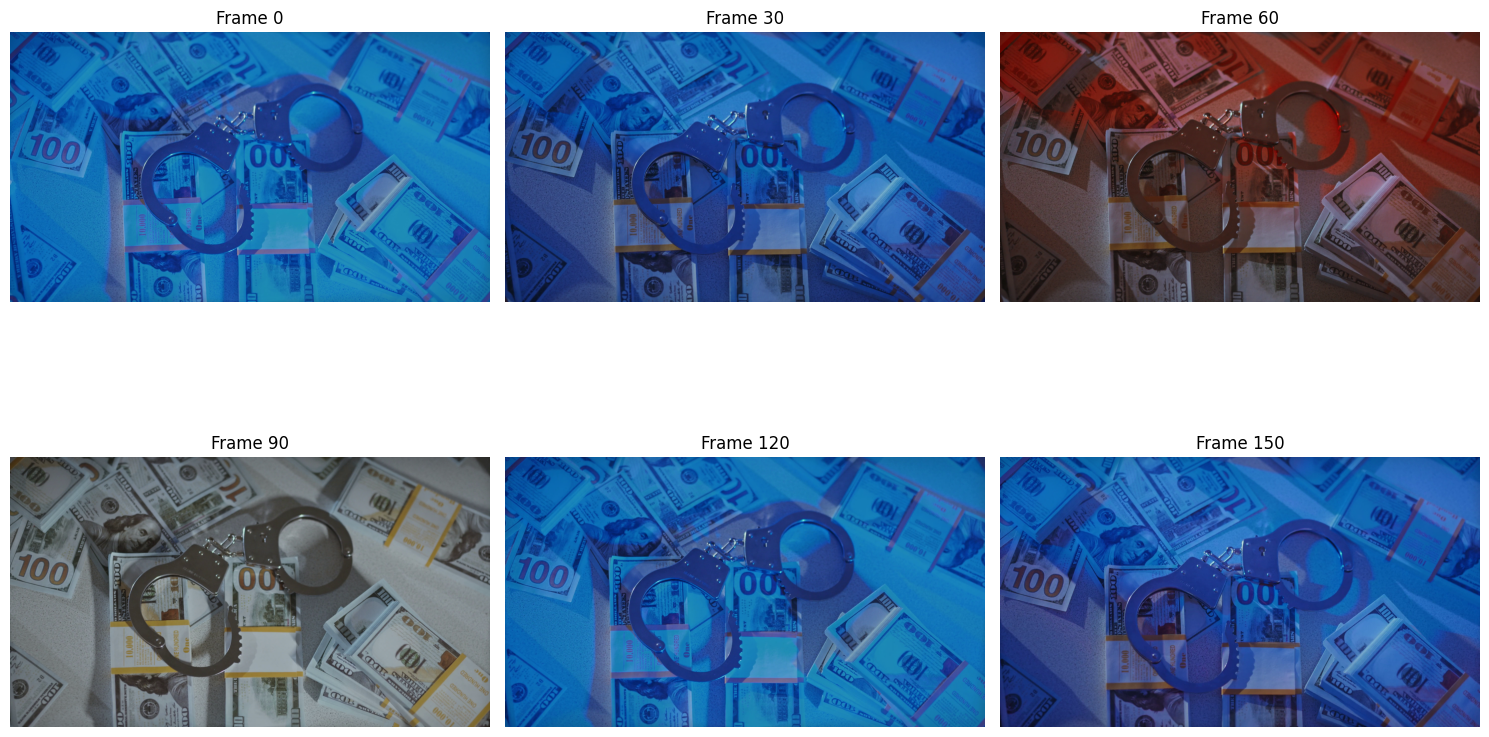

In [10]:

# Display sample frames
display_sample_frames(sample_frames)

## 🔧 Advanced Usage & Customization

### Quality Settings
```python
# Higher quality, larger files
save_frame(frame, count, dir, quality=100)

# Lower quality, smaller files
save_frame(frame, count, dir, quality=75)
```

### Thread Count Optimization
```python
# For faster systems
extract_frames(video, dir, threads=8)

# For slower systems
extract_frames(video, dir, threads=2)
```

### Display Customization
```python
# More frames in preview
display_sample_frames(frames, rows=3, cols=4)

# Fewer frames in preview
display_sample_frames(frames, rows=2, cols=2)
```

## 📝 Technical Details

### Performance Considerations
- Multi-threading improves processing speed significantly
- Memory usage is optimized by processing frames in parallel
- Frame quality can be adjusted to balance size and quality

### Output Format
- Frames are saved as JPEG files with sequential naming
- File naming format: `frame_XXXX.jpg` (zero-padded 4-digit numbers)
- Default JPEG quality is set to 95 for optimal quality/size ratio

### Error Handling
The script includes comprehensive error handling for:
- Invalid video files
- Directory access issues
- Memory constraints
- Corrupted frames

### 🔧 Customization
You can modify:
- Number of threads
- Output image quality
- Sample frame interval
- Visualization grid layout